## Titanic Dataset Analysis
#### by Samuel Lynaugh

First, let's import the necessary packages and read in our dataset. Then, let's look at a sample of our data to get a better understanding of it.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

train = pd.read_csv('train.csv',delimiter=',')
test = pd.read_csv('test.csv',delimiter=',')

train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
562,563,0,2,"Norman, Mr. Robert Douglas",male,28.0,0,0,218629,13.5000,NaN,S
819,820,0,3,"Skoog, Master. Karl Thorsten",male,10.0,3,2,347088,27.9000,NaN,S
97,98,1,1,"Greenfield, Mr. William Bertram",male,23.0,0,1,PC 17759,63.3583,D10 D12,C
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C
441,442,0,3,"Hampe, Mr. Leon",male,20.0,0,0,345769,9.5000,NaN,S
693,694,0,3,"Saad, Mr. Khalil",male,25.0,0,0,2672,7.2250,NaN,C
275,276,1,1,"Andrews, Miss. Kornelia Theodosia",female,63.0,1,0,13502,77.9583,D7,S
456,457,0,1,"Millet, Mr. Francis Davis",male,65.0,0,0,13509,26.5500,E38,S
773,774,0,3,"Elias, Mr. Dibo",male,NaN,0,0,2674,7.2250,NaN,C
649,650,1,3,"Stanley, Miss. Amy Zillah Elsie",female,23.0,0,0,CA. 2314,7.5500,NaN,S


Next, let's get a summary of the numerical columns. 

In [2]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above summary, we can see that 'Age' has missing values. Maybe the rest of the columns have some missing values as well (we can see cabin does above), so let's look into that as well.

In [3]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

So, we see that Age has 177 null values, Cabin has 687, and Embarked has 2. In the test set there is a null for Fare as well. We'll deal with this later, but first let's run some graphics on some of the attributes we think might be most predictive.

Let's start visualizing some data to get a better grasp on it. Based off of background knowledge of the Titanic disaster, we could predict that passenger class (aka wealth) and the sex of the passenger both probably played a significant role in who survived. Let's lend some credibility to that hypothesis.

/Users/samuellynaugh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


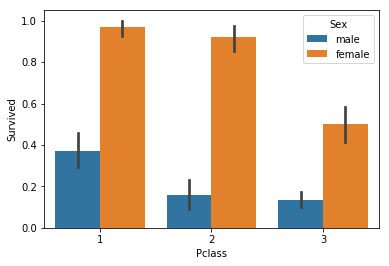

In [5]:
sns.barplot(x='Pclass', y='Survived', hue = 'Sex', data = train)

/Users/samuellynaugh/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


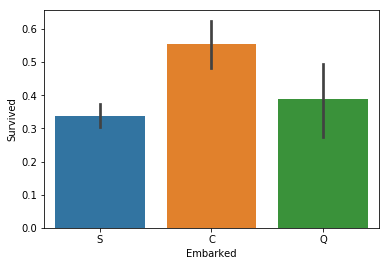

In [6]:
sns.barplot(x = 'Embarked', y = 'Survived', data = train)

We also might think that age could play a significant role - people might be more inclined to prioritize the safety of children, for instance, or maybe older passengers had a harder time making it to the lifeboats quickly. Unfortunately, when we visualize along age, we run into a problem. There are simply too many bins for age (see below).

As mentioned above, there are missing values in 'Age' and 'Fare', as well as 'Embarked'. Let's deal with that by creating values for the NA's, either using the median for numeric attributes or the mode for categorical.

In [8]:
train['Age'].fillna(train.groupby('Sex')['Age'].transform("median"), inplace=True)
train['Embarked'].fillna(train['Embarked'].mode()[0], inplace=True)
test['Age'].fillna(test.groupby('Sex')['Age'].transform("median"), inplace=True)
test['Fare'].fillna(test.groupby('Sex')['Fare'].transform("median"), inplace=True)
test['Embarked'].fillna(test['Embarked'].mode()[0], inplace=True)
train.sample(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
564,565,0,3,"Meanwell, Miss. (Marion Ogden)",female,27.0,0,0,SOTON/O.Q. 392087,8.0500,NaN,S
45,46,0,3,"Rogers, Mr. William John",male,29.0,0,0,S.C./A.4. 23567,8.0500,NaN,S
661,662,0,3,"Badt, Mr. Mohamed",male,40.0,0,0,2623,7.2250,NaN,C
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,27.0,0,0,370375,7.7500,NaN,Q
510,511,1,3,"Daly, Mr. Eugene Patrick",male,29.0,0,0,382651,7.7500,NaN,Q
794,795,0,3,"Dantcheff, Mr. Ristiu",male,25.0,0,0,349203,7.8958,NaN,S
60,61,0,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
337,338,1,1,"Burns, Miss. Elizabeth Margaret",female,41.0,0,0,16966,134.5000,E40,C
542,543,0,3,"Andersson, Miss. Sigrid Elisabeth",female,11.0,4,2,347082,31.2750,NaN,S
322,323,1,2,"Slayter, Miss. Hilda Mary",female,30.0,0,0,234818,12.3500,NaN,Q


In [9]:
#Let's import our sklearn libraries
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_curve, precision_recall_curve, auc, make_scorer, confusion_matrix, f1_score, fbeta_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm

/Users/samuellynaugh/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


We must also encode categorical features as numerical to run predictive models. Firts we will drop a few features - we will drop name and ticket, because they are unique (and thus not predictive), and Cabin, because it is mostly missing.


In [10]:
train = train.drop(columns=['Name','Cabin','Ticket'],axis=1)
test = test.drop(columns=['Name','Cabin','Ticket'],axis=1)
train.sample(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
287,288,0,3,male,22.0,0,0,7.8958,S
182,183,0,3,male,9.0,4,2,31.3875,S
458,459,1,2,female,50.0,0,0,10.5000,S
286,287,1,3,male,30.0,0,0,9.5000,S
422,423,0,3,male,29.0,0,0,7.8750,S
64,65,0,1,male,29.0,0,0,27.7208,C
781,782,1,1,female,17.0,1,0,57.0000,S
229,230,0,3,female,27.0,3,1,25.4667,S
383,384,1,1,female,35.0,1,0,52.0000,S
339,340,0,1,male,45.0,0,0,35.5000,S


In [11]:
train_data = pd.get_dummies(train, columns = ["Sex", "Embarked"],
                             prefix=["Sex","Embarked"])
test_data = pd.get_dummies(test, columns = ["Sex","Embarked"],
                             prefix=["Sex","Embarked"])
train_data.sample(10)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
519,520,0,3,32.00,0,0,7.8958,0,1,0,0,1
860,861,0,3,41.00,2,0,14.1083,0,1,0,0,1
810,811,0,3,26.00,0,0,7.8875,0,1,0,0,1
238,239,0,2,19.00,0,0,10.5000,0,1,0,0,1
414,415,1,3,44.00,0,0,7.9250,0,1,0,0,1
831,832,1,2,0.83,1,1,18.7500,0,1,0,0,1
604,605,1,1,35.00,0,0,26.5500,0,1,1,0,0
317,318,0,2,54.00,0,0,14.0000,0,1,0,0,1
396,397,0,3,31.00,0,0,7.8542,1,0,0,0,1
742,743,1,1,21.00,2,2,262.3750,1,0,1,0,0


In [12]:
all_features = train_data.drop("Survived",axis=1)
target_feature = train_data["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,target_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 11), (268, 11), (623,), (268,))

In [13]:
test_data.sample(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
187,1079,3,17.0,2,0,8.0500,0,1,0,0,1
49,941,3,36.0,0,2,15.9000,1,0,0,0,1
294,1186,3,36.0,0,0,9.5000,0,1,0,0,1
230,1122,2,14.0,0,0,65.0000,0,1,0,0,1
14,906,1,47.0,1,0,61.1750,1,0,0,0,1
395,1287,1,18.0,1,0,60.0000,1,0,0,0,1
340,1232,2,18.0,0,0,10.5000,0,1,0,0,1
178,1070,2,36.0,0,3,39.0000,1,0,0,0,1
364,1256,1,25.0,1,0,55.4417,1,0,1,0,0
20,912,1,55.0,1,0,59.4000,0,1,1,0,0


In [14]:
test_data.sample(10)

,PassengerId,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
170,1062,3,27.0,0,0,7.5500,0,1,0,0,1
33,925,3,27.0,1,2,23.4500,1,0,0,0,1
49,941,3,36.0,0,2,15.9000,1,0,0,0,1
290,1182,1,27.0,0,0,39.6000,0,1,0,0,1
81,973,1,67.0,1,0,221.7792,0,1,0,0,1
352,1244,2,18.0,0,0,73.5000,0,1,0,0,1
2,894,2,62.0,0,0,9.6875,0,1,0,1,0
98,990,3,20.0,0,0,7.8542,1,0,0,0,1
43,935,2,30.0,0,0,13.0000,1,0,0,0,1
270,1162,1,46.0,0,0,75.2417,0,1,1,0,0


Now, let's run a logistic regression and check out the accuracy.

In [15]:
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print(prediction_lr)
print("the accuracy is ",accuracy_score(prediction_lr,y_test)*100)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 0 1 1 0 1 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 1 0 0 0 1 0 0 1 1 0 0 0 1 1 1 0 1 0 0 1 0 1 1 0 0 1 0 1 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 1 1 0 1 0 0 0 1 1 0 0 0 0 1 1
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 1 1 0 0 1 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 0]
the accuracy is  80.22388059701493


As you can see, the accuracy is 80.22%, which is pretty good. Let's see if we can make it better with a different modeling approach.

In [16]:
model = RandomForestClassifier(criterion='gini', n_estimators=700,
                             min_samples_split=10,min_samples_leaf=1,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
print(prediction_rf)
print("the accuracy of the random forest is ", accuracy_score(prediction_rf,y_test)*100)

[0 0 0 1 0 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]
the accuracy of the random forest is  80.97014925373134


The accuracy of the random forest is 80.97%, a small but notable increase from the logistic regression. Let's play with the hyperparameters a bit and see if we can improve.

In [17]:
model = RandomForestClassifier(criterion='gini', n_estimators=1000,
                             min_samples_split=10,min_samples_leaf=4,
                             max_features='auto',oob_score=True,
                             random_state=1,n_jobs=-1)
model.fit(X_train,y_train)
prediction_rf=model.predict(X_test)
print(prediction_rf)
print("The accuracy of the random forest is ", accuracy_score(prediction_rf,y_test)*100)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 1 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 1 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]
The accuracy of the random forest is  81.34328358208955


By increasing the number of estimators to 1000 and the minimum number of samples in each leaf node to 4, we can increase the prediction accuracy to 81.34%. Now let's try and XGBoost model.

In [18]:
!pip install xgboost

distributed 1.21.8 requires msgpack, which is not installed.
You are using pip version 10.0.1, however version 19.1 is available.
You should consider upgrading via the 'pip install --upgrade pip' command.


In [35]:
from xgboost import XGBClassifier
model = XGBClassifier(eta = .005)
model.fit(X_train,y_train)
prediction_xgb = model.predict(X_test)
print(prediction_xgb)
print("The accuracy of the XGBoost model is ", accuracy_score(prediction_xgb,y_test)*100)

[0 0 0 1 1 1 1 0 1 1 0 0 0 0 0 1 1 1 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 1 0 1 1 0 0 1 0 0 0 1 1 1 0 1
 0 0 1 1 1 0 0 1 1 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 1
 0 1 0 0 0 0 0 1 0 0 1 1 1 0 1 1 0 1 0 1 0 0 1 1 1 1 0 0 0 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 0 0 0 0 1 1 1 0 1 0 0 0 1 0 0 1 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1
 0 0 0 1 0 1 1 1 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 1 1 1 1 0 0 0 0 0]
The accuracy of the XGBoost model is  82.83582089552239


/Users/samuellynaugh/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


As we can see above, the accuracy for the XGBoost model is 82.84%, improving upon the Random Forest Model. This is pretty good, so I'll export it to a .csv so I can submit it. Now, I'll predict on the actual Kaggle test data and upload our answers to Kaggle.

In [36]:
prediction_final_xgb = model.predict(test_data)
print(prediction_final_xgb)

[0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1 1 0 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 0
 1 1 0 1 0 1 1 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0
 1 1 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 1 0 0 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 1 0 0 1 0 0 0 1 1 1 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 0 1 0
 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 0 0 1 0 0 0]


/Users/samuellynaugh/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [23]:
submit = pd.concat([test_data.PassengerId, pd.DataFrame(prediction_final_xgb)], axis = 'columns')
submit.columns = ["PassengerId", "Survived"]
submit.to_csv('Lynaugh_XGB_Titanic.csv', header = True, index = False)